In [1]:
import pandas as pd

# Load the dataset
file_path = 'nypd-accidents.csv'
accident_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
accident_data.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,01/01/2015,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,01/01/2015,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,01/01/2015,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,01/01/2015,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,01/01/2015,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


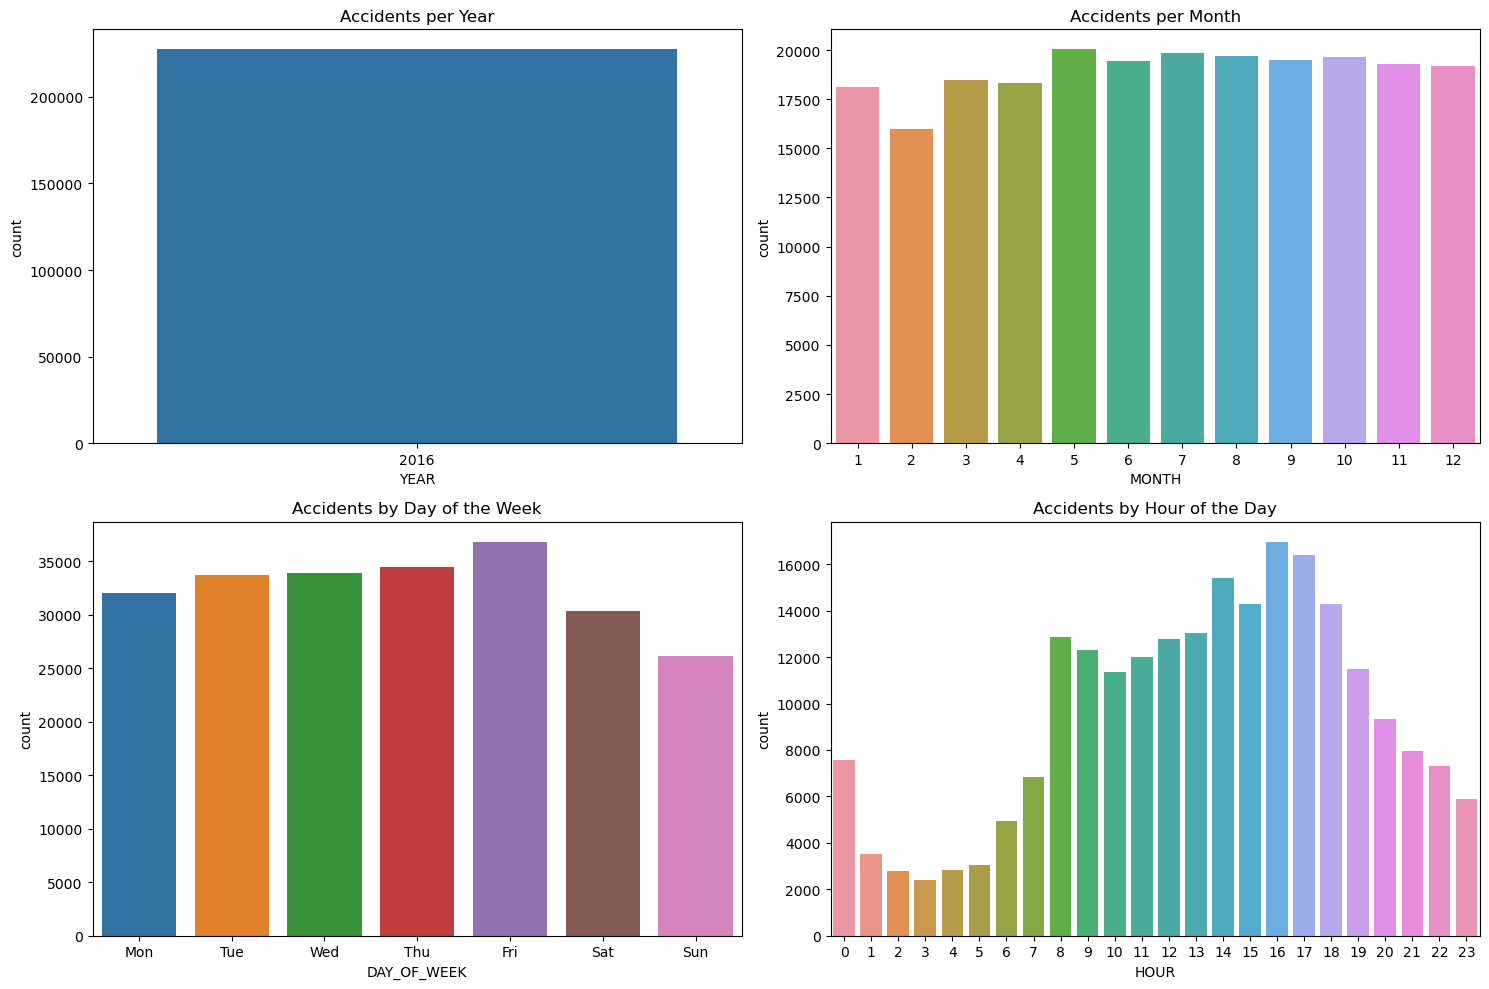

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Convert DATE and TIME columns to datetime format
accident_data['DATE'] = pd.to_datetime(accident_data['DATE'])
accident_data['YEAR'] = accident_data['DATE'].dt.year
accident_data['MONTH'] = accident_data['DATE'].dt.month
accident_data['DAY_OF_WEEK'] = accident_data['DATE'].dt.dayofweek
accident_data['HOUR'] = pd.to_datetime(accident_data['TIME'], format='%H:%M').dt.hour

#filter accident data to only include 2016
accident_data = accident_data[accident_data['YEAR'] == 2016]

# Plotting trends over years, months, day of the week, and hour of the day
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Yearly trend
sns.countplot(x='YEAR', data=accident_data, ax=axes[0, 0])
axes[0, 0].set_title('Accidents per Year')

# Monthly trend
sns.countplot(x='MONTH', data=accident_data, ax=axes[0, 1])
axes[0, 1].set_title('Accidents per Month')

# Day of the week trend
sns.countplot(x='DAY_OF_WEEK', data=accident_data, ax=axes[1, 0])
axes[1, 0].set_title('Accidents by Day of the Week')
axes[1, 0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Hour of the day trend
sns.countplot(x='HOUR', data=accident_data, ax=axes[1, 1])
axes[1, 1].set_title('Accidents by Hour of the Day')

plt.tight_layout()
plt.show()


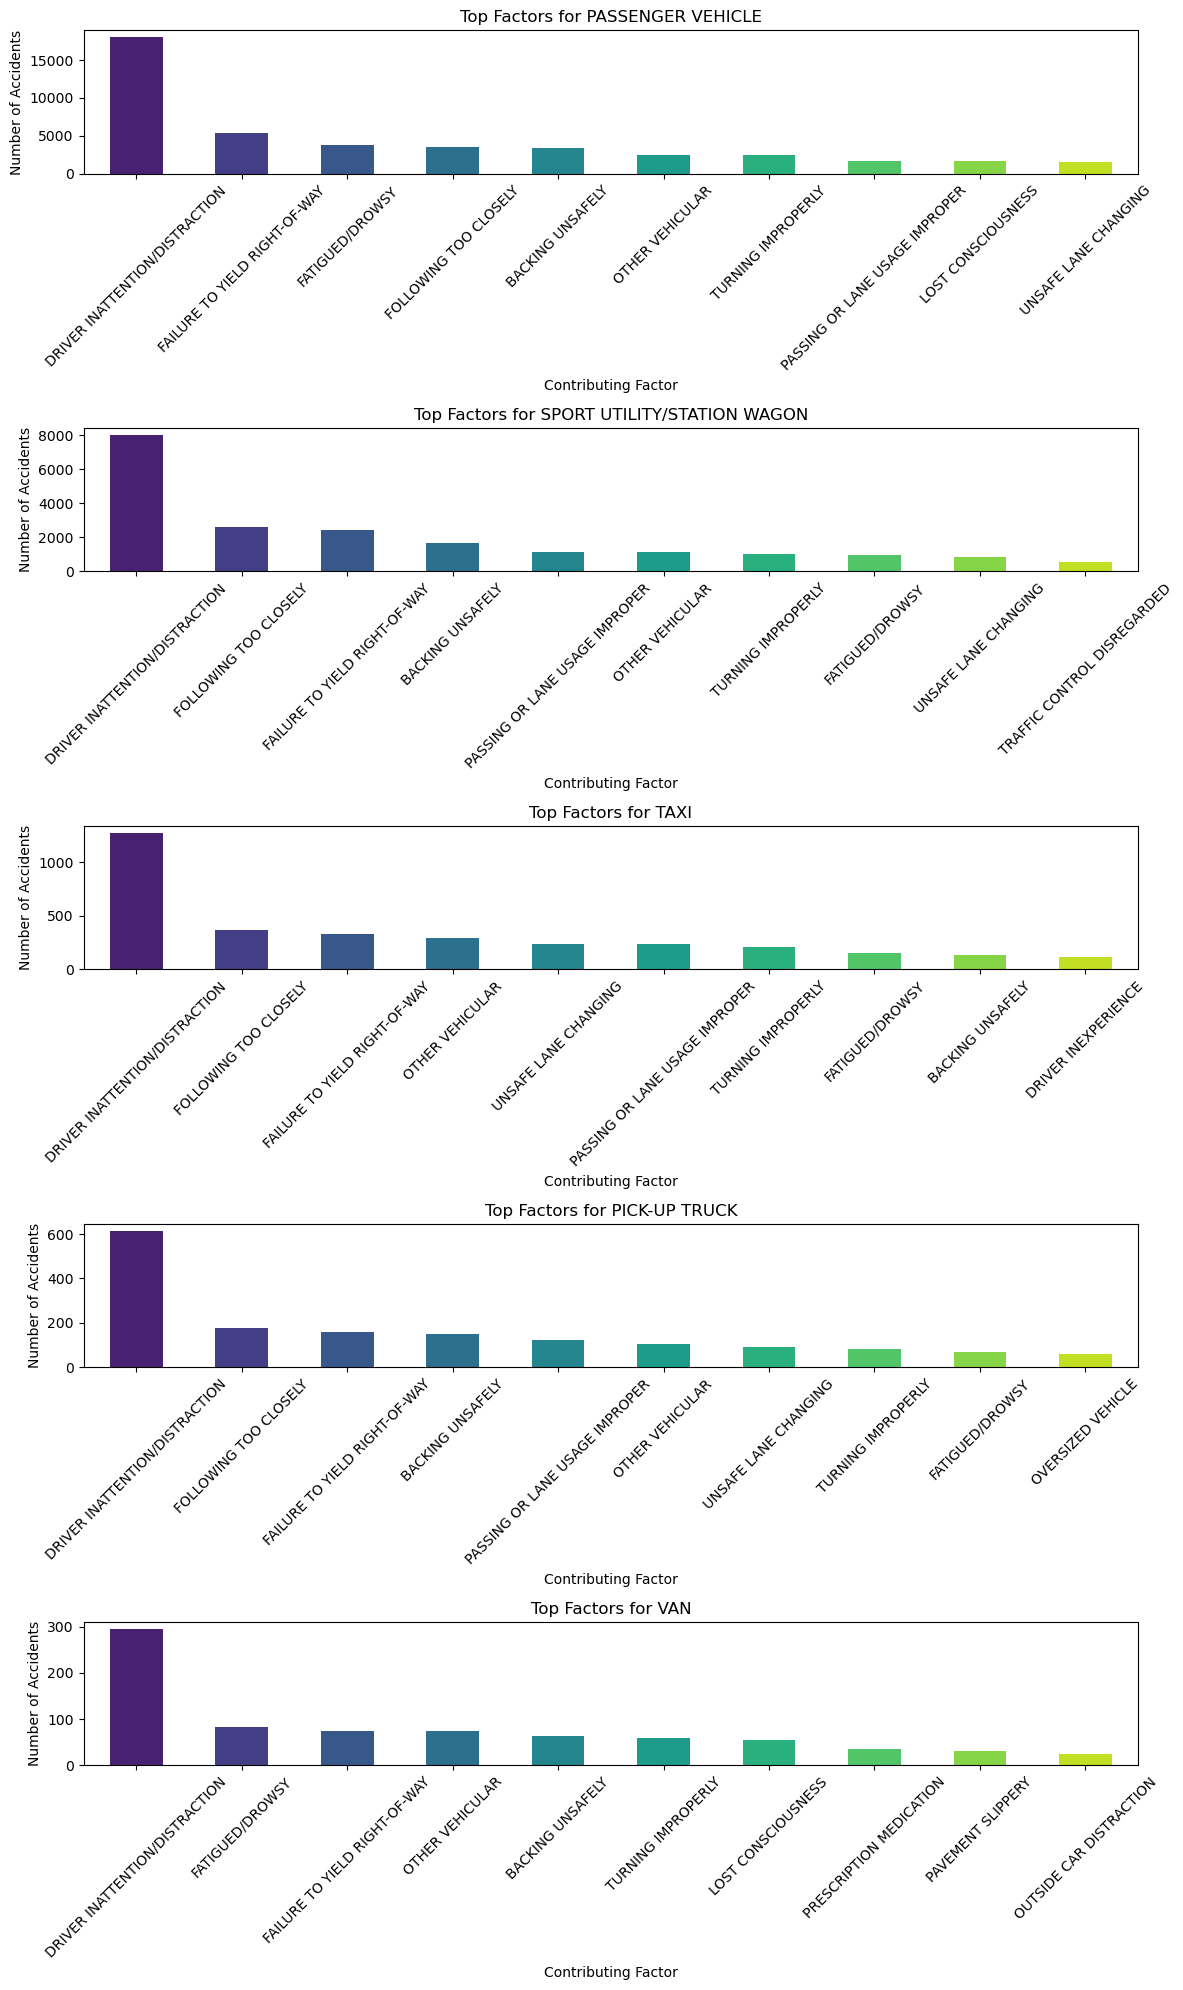

In [13]:
# Re-filtering the data
filtered_data_corrected = accident_data[(~accident_data['VEHICLE 1 TYPE'].isin(['OTHER', 'UNKNOWN'])) &
                               (accident_data['VEHICLE 1 FACTOR'] != 'UNSPECIFIED')]

filtered_data_corrected = filtered_data_corrected[(~filtered_data_corrected['VEHICLE 1 TYPE'].isin(['OTHER', 'UNKNOWN'])) &
                               (filtered_data_corrected['VEHICLE 1 FACTOR'] != " ")]

# Update top vehicle
top_vehicle_types_corrected = filtered_data_corrected['VEHICLE 1 TYPE'].value_counts().head(5).index

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(top_vehicle_types_corrected), ncols=1, figsize=(12, len(top_vehicle_types_corrected) * 4))
axes = axes.flatten() if len(top_vehicle_types_corrected) > 1 else [axes]

# Plotting each vehicle type
for i, vehicle_type in enumerate(top_vehicle_types_corrected):
    factors = filtered_data_corrected[filtered_data_corrected['VEHICLE 1 TYPE'] == vehicle_type]['VEHICLE 1 FACTOR'].value_counts().head(10)
    factors.plot(kind='bar', ax=axes[i], color=sns.color_palette("viridis", len(factors)))
    axes[i].set_title(f'Top Factors for {vehicle_type}')
    axes[i].set_xlabel('Contributing Factor')
    axes[i].set_ylabel('Number of Accidents')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
